# Исследование успешности компьютерных игр для интернет-магазина «Стримчик»

# Описание проекта

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Для улучшения планирования рекламных кампаний и выбора перспективных направлений развития бизнеса, необходимо выявить закономерности, определяющие успешность игр.

# Цель

Выявить определяющие успешность игры закономерности, чтобы в будущем можно было определять перспективные направления развития и составлять рекламные кампании.

# Задачи

1. Подготовить данные для анализа.
2. Провести исследовательский анализ данных.
3. Составить портрет пользователя для каждого региона.
4. Проверить гипотезы относительно рейтингов игр.
5. Написать общий вывод по результатам исследования.

# Ход исследования

**Шаг 1. Подготовка данных**

- Заменить названия столбцов (привести к нижнему регистру).
- Преобразовать данные в нужные типы и описать, в каких столбцах заменили тип данных и почему.
- Обработать пропуски:
  - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.
  - Описать причины, которые могли привести к пропускам.
  - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и описать, как её обработать.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 2. Провести исследовательский анализ данных**

- Посмотреть, сколько игр выпускалось в разные годы.
- Проанализировать, как менялись продажи по платформам.
- Определить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Проанализировать общее распределение игр по жанрам.

**Шаг 3. Составить портрет пользователя каждого региона**

Для пользователей из Северной Америки (NA), Европы (EU) и Японии (JP):
- Определить самые популярные платформы (топ-5) и описать различия в долях продаж.
- Определить самые популярные жанры (топ-5) и пояснить разницу.
- Проверить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Шаг 4. Проверить гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Шаг 5. Написать общий вывод**

Подвести итоги исследования, описать выявленные закономерности и дать рекомендации по перспективным направлениям развития и планированию рекламных кампаний.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Примечания:
1. Данные за 2016 год могут быть неполными.
2. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Загрузка данных
try :
    df = pd.read_csv('/Users/rika/Downloads/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Общая информация о датафрейме:**

- В датафрейме 16715 записей и 11 столбцов.
- Есть пропущенные значения в некоторых столбцах.
- Типы данных в столбцах в основном числовые (float64), за исключением столбцов с названием игры, платформой, жанром, оценкой пользователей и рейтингом ESRB (object).
- Некоторые столбцы именю некорректно присвоенные типы данных
- Названия столбцов составлены стилистически неверно, необходимо привести их к нижнему реистру 

Необходимо провести предварительную обработку данных для заполнения пропущенных значений и приведения типов данных к корректным.

## Шаг 2. Предобработка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости: 
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
# Переименование названий столбцов 
df = df.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'release_year', 
    'Genre':'genre', 
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales', 
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score', 
    'User_Score':'user_score', 
    'Rating':'age_group'}) 

In [10]:
#Определяем столбцы с пропущенными значениями, их количество и тип данных
na = pd.DataFrame({
    'Кол-во пропусков': df.isna().sum()[df.isna().sum()>0],
    'Доля пропусков': (df.isna().sum()[df.isna().sum() > 0] / df.shape[0] *100).round(1).astype(str)+'%',
    'Тип данных': df.dtypes[df.isna().sum()>0]
})
display(na)
print(" - Столбцы, содержащие пропущенные значения:")
for i in df.columns[df.isna().sum()>0]:
    print ("    ·", i)
print ()
print (" - Колонки имеют разные типы данных:")
for i in df.dtypes.unique():
    print ("    ·", i)
print ()
print("Перед дальнейшим анализом потребуется обработка данных: заполнение пропущенных значений для проведения более точного анализа.")

,Кол-во пропусков,Доля пропусков,Тип данных
name,2,0.0%,object
release_year,269,1.6%,float64
genre,2,0.0%,object
critic_score,8578,51.3%,float64
user_score,6701,40.1%,object
age_group,6766,40.5%,object


 - Столбцы, содержащие пропущенные значения:
    · name
    · release_year
    · genre
    · critic_score
    · user_score
    · age_group

 - Колонки имеют разные типы данных:
    · object
    · float64

Перед дальнейшим анализом потребуется обработка данных: заполнение пропущенных значений для проведения более точного анализа.


In [11]:
# Пропуски в столбцах name, genre, release_year составляют очень малую долю от количества строк в датафрейме
# и сложно подобрать логичный способ их заполнения - > удалим эти строки 
df = df.dropna (subset = ['name','genre','release_year']).reset_index(drop = True)

In [12]:
#пропуски в столбцах , 'critic_score', 'user_score', 'age_group' заполним "заглушками"
#т.к. заполнить медианой/средним может исказить данные, тем более пропусков в столбцах с оценками очень много 
columns = ['critic_score', 'user_score', 'age_group']
for i in columns:
    df.loc[df[i].isna(),i] = -1

In [13]:
# Определение типов данных
df.dtypes

name             object
platform         object
release_year    float64
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score       object
age_group        object
dtype: object

    - name             object - OK
    - platform         object - OK
    - release_year    float64 - > int (год это всегда целое число) 
    - genre            object - OK
    - na_sales        float64 - OK
    - eu_sales        float64 - OK
    - jp_sales        float64 - OK
    - other_sales     float64 - OK
    - critic_Score    float64 - OK
    - user_Score       object - > float (оценка пользователей - это число 0-10)
    - age_group        object - OK

In [15]:
#Пеобразование года выпуска игры в целочисленный тип данных
df.release_year = df.release_year.astype('int32')

In [16]:
df.user_score.unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
#столбец 'user_score' содержит числовые значения за исключением "tbd" (to be determined)
#поэтому тип данных был определен как страка 
#заполним их заглушками для преобразования типа данных в числовой 
df.loc[df.user_score == 'tbd', 'user_score'] = -1

In [18]:
#Преобразование типа данных пользовательских оценок в числовой формат 
df.user_score = df.user_score.astype(float)

In [19]:
#проверка наличия дублирующихся строк 
df.duplicated().sum()

0

In [20]:
#Поиск неявных дубликатов
df.loc[df[['name','platform', 'release_year']].duplicated()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_group
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [21]:
df.loc[(df.name == 'Madden NFL 13')& (df.platform =='PS3')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_group
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [22]:
#Группировка данных по признакам игры чтобы не потерять сумму продаж при удалении дубликата
df = df.groupby(['name', 'platform', 'release_year', 'genre'], sort = False).agg ({
    'na_sales':'sum', 
    'eu_sales':'sum', 
    'jp_sales':'sum', 
    'other_sales': 'sum', 
    'critic_score': 'first', 
    'user_score': 'first', 
    'age_group': 'first'
    }).reset_index()

#Удаление дубликатов
df = df.drop_duplicates()

In [23]:
#создание столбца с суммарными продажами во всех регионах 
df['ttl_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

**Вывод по предобработке данных:**

1. **Названия столбцов** приведены к нижнему регистру

2. **Обработка пропусков:**
   - Пропуски в столбцах `release_year`,`name` и `genre` удалены, так как они составляют малую долю от общего объема данных.
   - Пропуски в столбцах  `critic_score`, `user_score` и `age_group` были заполнены заглушками (`-1`) из-за сложности подбора замены.
   - Значения "tbd" в столбце `user_score` также заменены на другую заглушку для преобразования типа данных.
   
3. **Изменение типов данных:**
   - Столбец `release_year` преобразован в целочисленный тип данных, так как год выпуска игры всегда является целым числом.
   - Столбец `user_score` преобразован в числовой формат чтобы работать с оценками пользователей.

4. **Создан новый столбец** `ttl_sales`, содержащий суммарные продажи по всем регионам.


**Причины пропусков данных:**

 - Пропуски в столбце `user_score` могут означать то же самое что "tbd" - будет определено позднее
 - Критики могут оценивать не все игры, менее популярные игры могут быть проигнорированы ими поэтому появляются пропуски в столбце `critic_score`
 - ESRB также навряд ли абсолютно каждой игре присваивает рейтинг 
 - кроме того могут быть технические данные при записи данных

- Учитывая эти причины, заполнение пропусков заглушками позволяет сохранить данные для анализа, не искажая их слишком сильно медианными значениями, что дает возможность провести более точный анализ

## Шаг 3. Исследовательский анализ данных
1.	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2.	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3.	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4.	Не учитывайте в работе данные за предыдущие годы.
5.	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
6.	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
7.	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
8.	Соотнесите выводы с продажами игр на других платформах.
9.	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

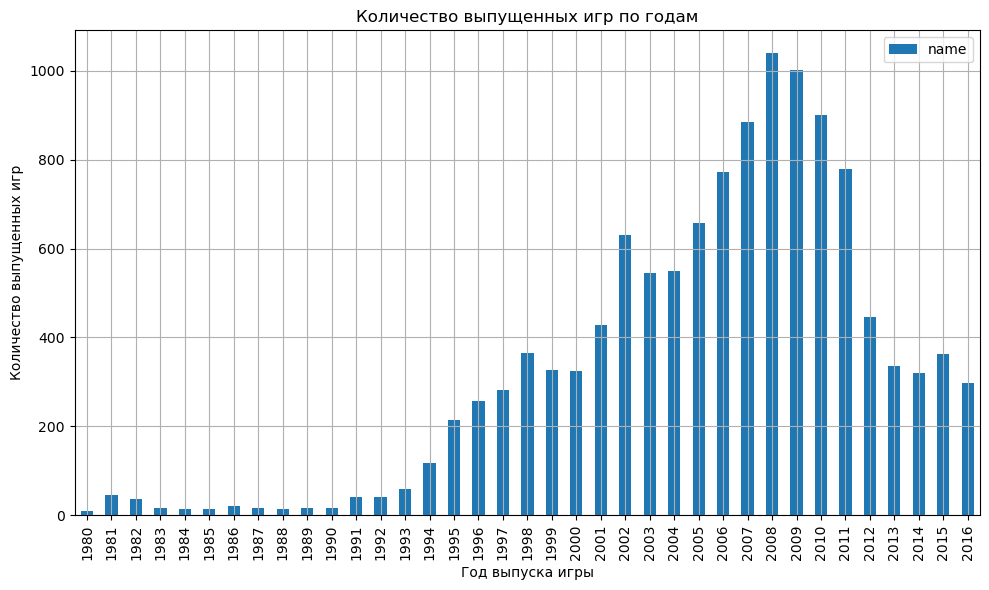

In [27]:
df[['name','release_year']] \
    .drop_duplicates() \
    .groupby('release_year')['name'].count() \
    .reset_index() \
    .plot(kind = 'bar', x = 'release_year', figsize = (10,6), grid = True)
plt.ylabel ('Количество выпущенных игр')
plt.xlabel ('Год выпуска игры')
plt.title ('Количество выпущенных игр по годам')
plt.tight_layout()
plt.show()

In [28]:
df[['name','release_year']] \
    .drop_duplicates() \
    .groupby('release_year')['name'].count().describe().round(2)

count      37.00
mean      329.59
std       319.14
min         9.00
25%        36.00
50%       297.00
75%       546.00
max      1039.00
Name: name, dtype: float64

- В выборке есть данные по выпущенным играм начиная с 1980 года, однако такой горизон может быть излишним, поскольку рынок игр с того времени сильно изменился 
- Если  в 1980-1994гг выпускалось в среднем 38 игр в год, то начиная с 1995г среднее количество выпущенных игр в год составило 532, c максимальным значением 1039 игр в 2008 году 

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

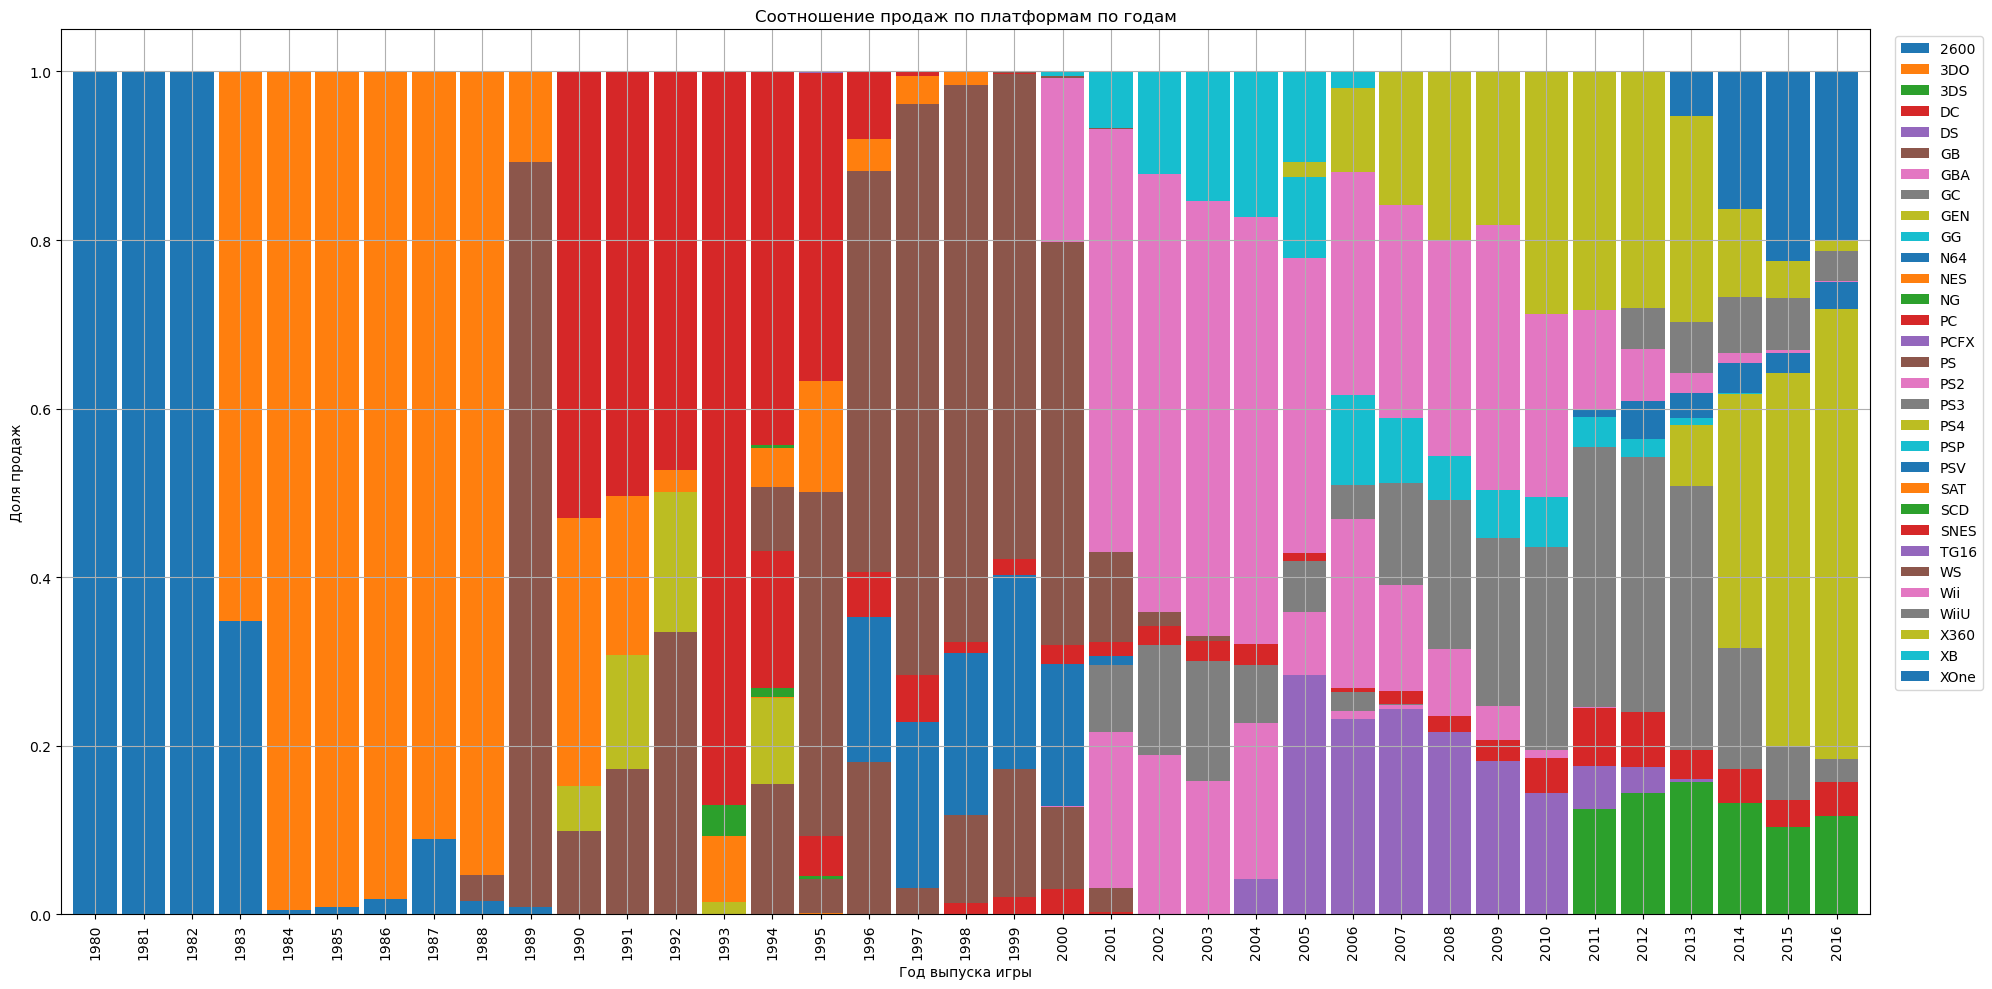

In [31]:
# Как менялись продажи по платформам?

platform  = df.groupby(['release_year','platform'])['ttl_sales'].sum() \
        .unstack() 
year_sales = df.groupby('release_year')['ttl_sales'].sum()

platform.divide(year_sales, axis = 0).plot(kind = 'bar',  stacked = True, grid = True, figsize = (20,10),width=0.9)
plt.title('Соотношение продаж по платформам по годам')
plt.xlabel ('Год выпуска игры')
plt.ylabel ('Доля продаж')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.show()

- На графике отображена динамика изменения популярности различных игровых платформ со временем.
- Заметно, что с течением времени некоторые платформы появляются на рынке, достигают своего пика популярности и затем уступают место новым.
- В начале 1990-х годов на рынке видеоигр присутствовало лишь несколько платформ 1-5, но с течением времени их число постепенно увеличивалось.


In [33]:
#платформы с наибольшими суммарными продажами 
top_platform = df.groupby('platform')['ttl_sales'].sum().sort_values(ascending = False).head(10)
top_platform 

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: ttl_sales, dtype: float64

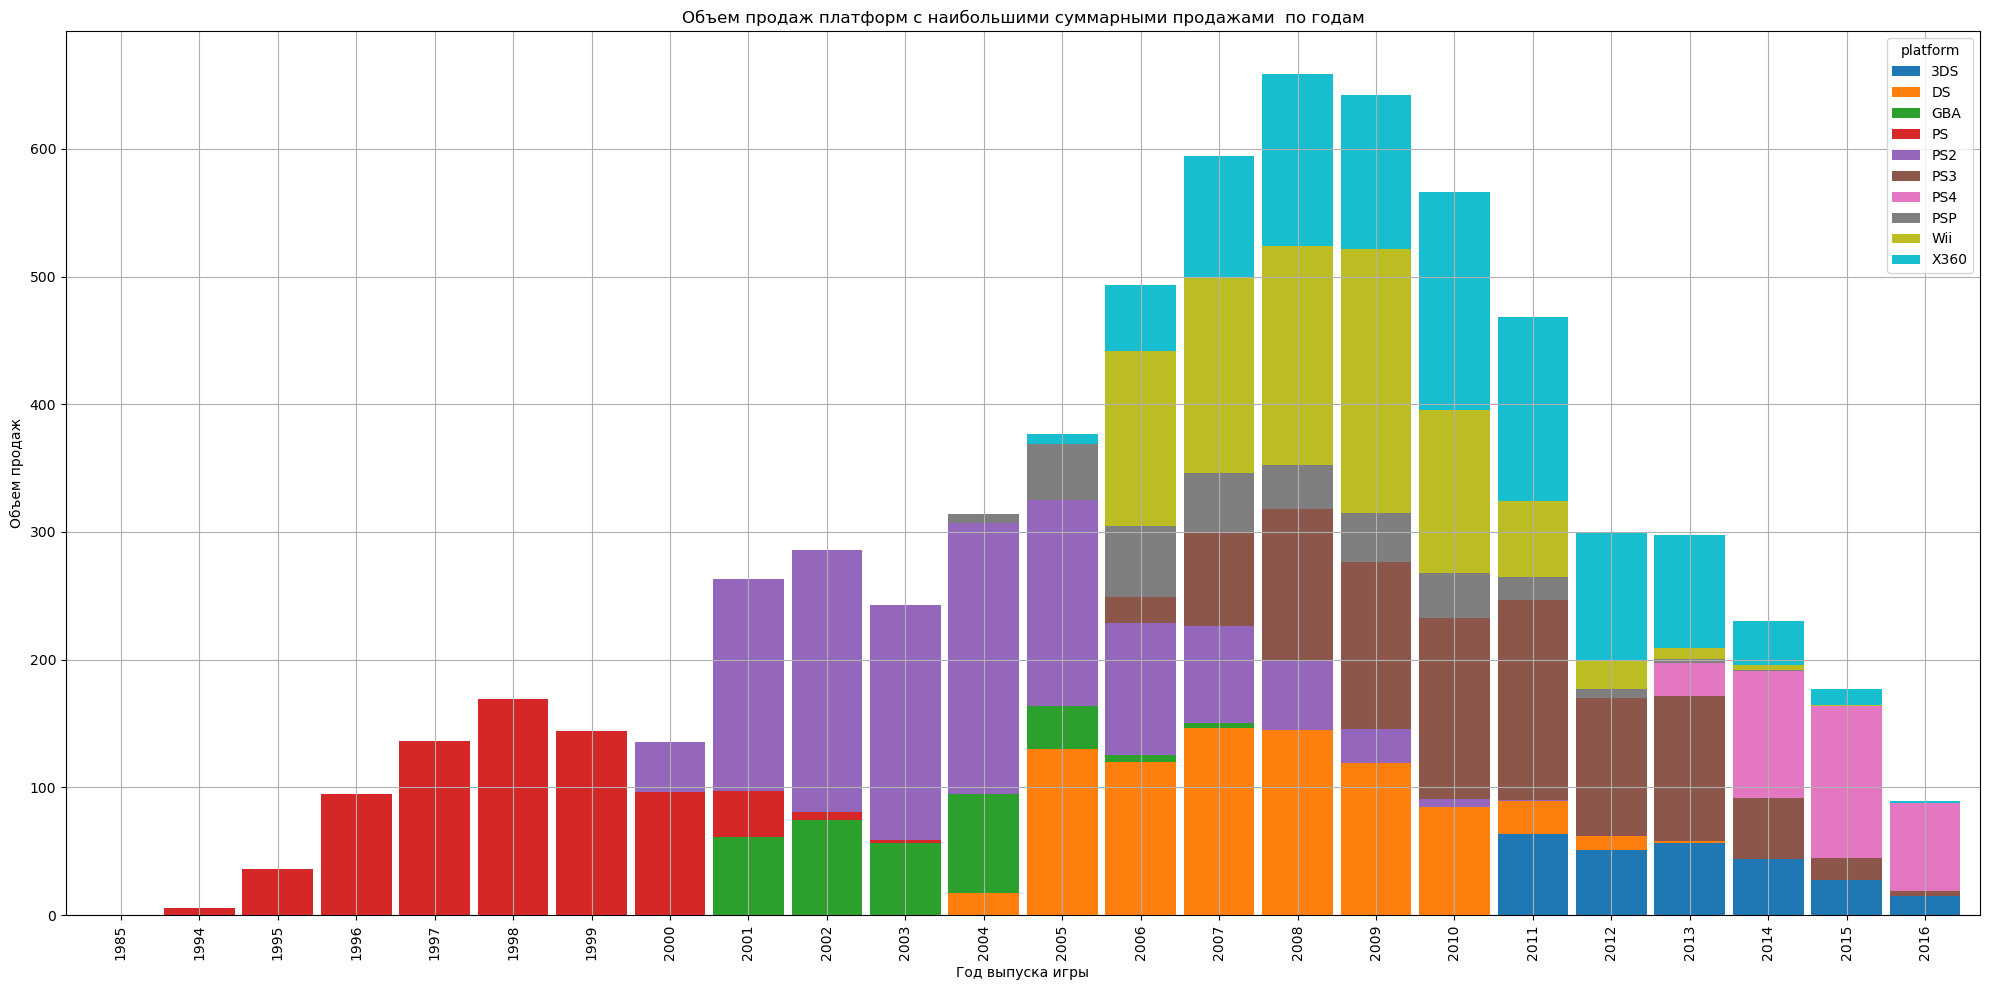

In [34]:
#распределение продаж топовых платформ по годам 

df.loc[df['platform'].isin(top_platform.index)] \
    .groupby(['release_year', 'platform'])['ttl_sales'].sum().unstack() \
    .plot(kind = 'bar',  stacked = True, grid = True, figsize = (20,10),width=0.9)
plt.title('Объем продаж платформ с наибольшими суммарными продажами  по годам')
plt.xlabel ('Год выпуска игры')
plt.ylabel ('Объем продаж')
plt.tight_layout()
plt.show()

In [35]:
# Срок существования платформ 

df.groupby(['platform','release_year']).count() \
    .reset_index()[['platform','release_year']].drop_duplicates() \
    .groupby('platform')['release_year'].count().describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: release_year, dtype: float64

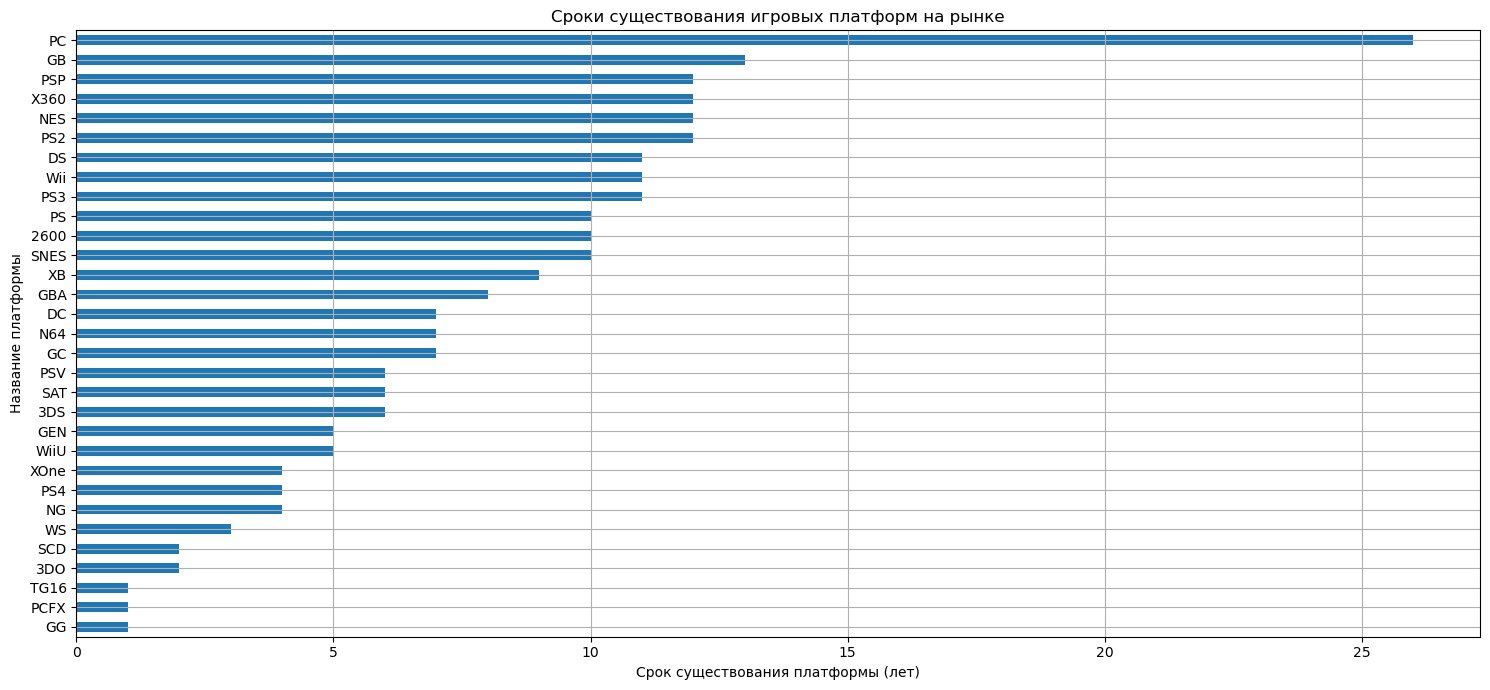

In [36]:
# Срок существования платформ 

df.groupby(['platform','release_year']).count() \
    .reset_index()[['platform','release_year']].drop_duplicates().groupby('platform')['release_year'].count() \
    .sort_values().plot (kind = 'barh',figsize = (15,7), grid = True)
plt.title('Сроки существования игровых платформ на рынке')
plt.xlabel ('Срок существования платформы (лет)')
plt.ylabel ('Название платформы')
plt.tight_layout()
plt.show()

- В среднем платформы существуют на рынке 7-8 лет и сменяются более новыми 
- Максимальный срок присутствия на рынке - 26 лет у платформы PC, но ее нет среди платформ с наибольшими продажами, поэтому долгое присутствие на рынке не говорит обольших продажах
- Максимальный срок присутствия на рынке - 1 год у ряда платформ: GG, PCFX, TG16

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 
**Не учитывайте в работе данные за предыдущие годы.**
 - Исходя из предшествующего анализа на графиках респределения выпуска игр и их продаж виден всплеск в 2006-2011 гг
 - В 2012-2016 гг количество выпущенных игр имеет более равномерное распределение и 5 лет являются достаточным горизонтом для планирования дальнейших продаж

In [39]:
ddf = df.loc[df['release_year']>=2012]

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: ttl_sales, dtype: float64

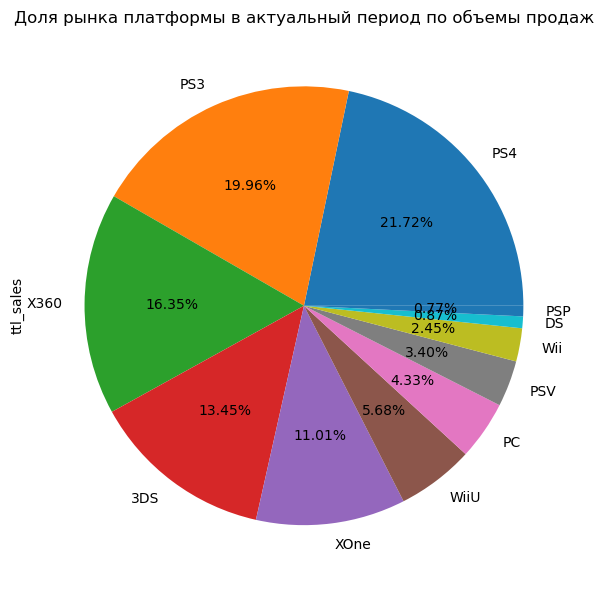

In [41]:
act_platf = ddf.groupby('platform')['ttl_sales'].sum().sort_values(ascending = False)
display(act_platf)
act_platf.plot(kind = 'pie',autopct='%1.2f%%',figsize = (8,6))
plt.title('Доля рынка платформы в актуальный период по объемы продаж')
plt.tight_layout()
plt.show()

- В aктуальный период на рынке присутствовало 11 платформ
- Лидируют по продажам 3 платформы: PS4, PS3, X360 - на их долю приходится более половины продаж (58,03%)
- Также значимую долю рынка по объему прлдаж имеют: 3DS, XOne
- На остальные платформы приходится менее 17,5% рынка 

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,5.0,2.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0
mean,38.9,6.3,12.5,57.8,78.5,2.8,9.8,7.1,16.4,47.3,39.8
std,17.2,6.7,6.8,50.6,40.6,3.5,4.7,8.8,7.1,44.6,20.3
min,15.1,1.5,5.2,3.6,26.0,0.1,4.2,0.2,4.6,1.5,19.0
25%,27.8,3.9,8.5,16.8,58.4,0.2,6.2,1.1,16.4,12.0,24.4
50%,43.8,6.3,12.4,47.8,84.6,1.7,10.6,3.8,17.6,34.7,40.1
75%,51.4,8.6,13.3,107.4,104.7,4.3,11.9,8.6,21.7,88.6,55.6
max,56.6,11.0,23.2,113.2,118.9,7.7,16.2,21.7,22.0,99.7,60.1


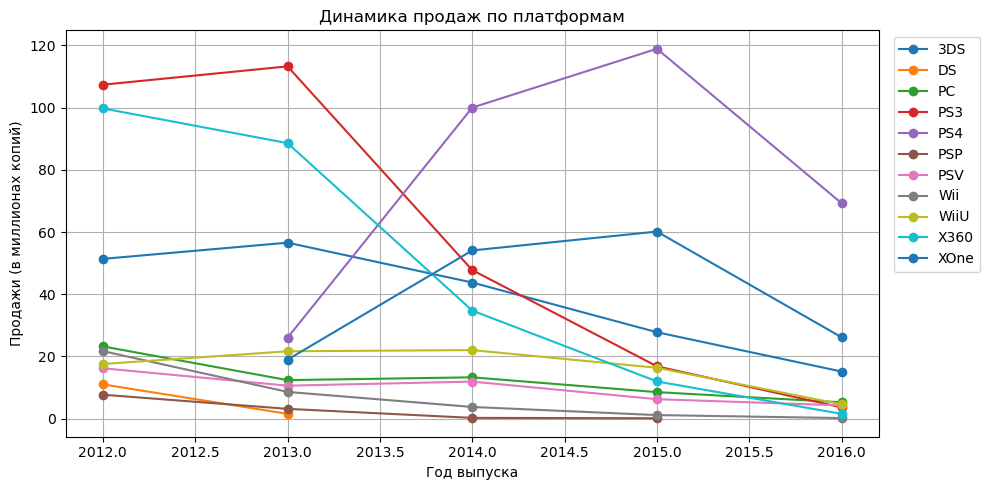

In [43]:
act_platf_year = ddf.groupby(['release_year','platform'])['ttl_sales'].sum().unstack()
display(act_platf_year.describe().round(1))

act_platf_year.plot(kind='line', marker='o', figsize=(10, 5), grid = True)
plt.title('Динамика продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи (в миллионах копий)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.show()

- Продажи большинства платформ имеюит явную динамику к снижению в актуальный период
- Потенциально прибыльные платформы : PS4, XOne - они лидируют по продажам и имеют положительную динамику в 2013-2015гг
- Также можно отметить 3DS, продажи которой не снизились ниже 6 млн копий в 2016 году (в сравнении с конкурентами) 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

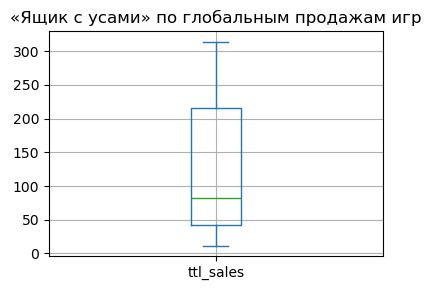

In [46]:
ddf.groupby('platform')['ttl_sales'].sum().plot(kind = 'box',grid = True, figsize =  (4,3))
plt.title('«Ящик с усами» по глобальным продажам игр')
plt.tight_layout()
plt.show()

In [47]:
ddf.groupby('platform')['ttl_sales'].sum().describe().round(1)

count     11.0
mean     131.5
std      112.1
min       11.2
25%       42.3
50%       82.2
75%      215.6
max      314.1
Name: ttl_sales, dtype: float64

- Медианное значение игр в разбивке по платформам - 82.2 млн копий, что значимо отличается от среднего значения, что связано с неравномерным распределением продаж на различных платформах.
- Значения продаж ниже медианы имеют гораздо меньший размах, чем значения продаж выше медианы. 
- Верхний ус больше нижнего уса, что указывает на большее стандартное отклонение популярных, хорошо продаваемых платформ платформ, нежели у платформ с меньшим объемом продаж
- На графике нет точек за пределами усов, что свидетельствует о том, что нет значительных выбросов или экстремальных значений продаж на платформах.

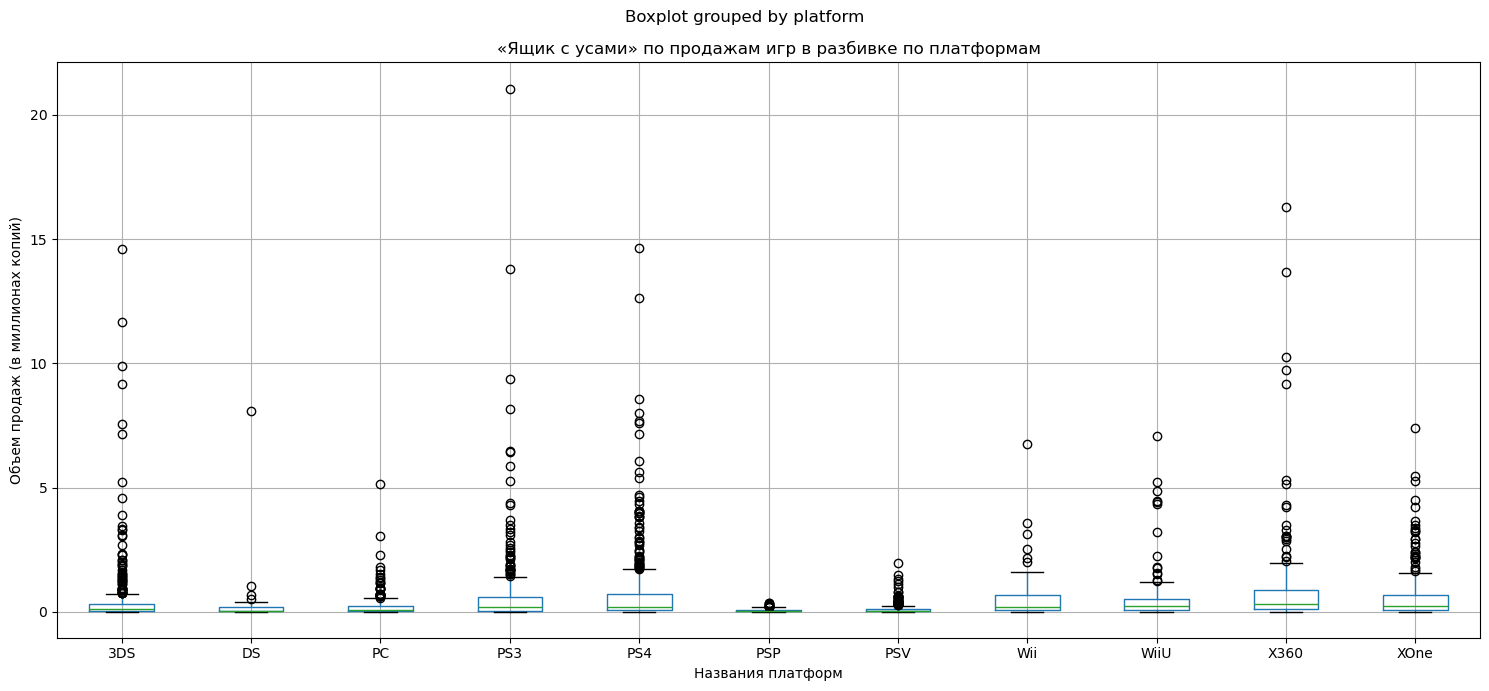

In [49]:
# Создание общего объекта для рисования (figure) и области для всех графиков (axes)
fig, ax  = plt.subplots(figsize =  (15,7))
ddf[['platform', 'ttl_sales']].boxplot (by = 'platform', ax = ax)
plt.xlabel('Названия платформ')
plt.ylabel('Объем продаж (в миллионах копий)')
plt.title('«Ящик с усами» по продажам игр в разбивке по платформам')
plt.tight_layout()
plt.show()

In [50]:
ddf.pivot(columns='platform', values='ttl_sales').describe().round(1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,396.0,31.0,250.0,492.0,392.0,173.0,411.0,54.0,147.0,292.0,247.0
mean,0.5,0.4,0.3,0.6,0.8,0.1,0.1,0.7,0.6,0.8,0.6
std,1.4,1.4,0.5,1.5,1.6,0.1,0.2,1.2,1.1,1.7,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1
50%,0.1,0.0,0.1,0.2,0.2,0.0,0.0,0.2,0.2,0.3,0.2
75%,0.3,0.2,0.2,0.6,0.7,0.1,0.1,0.7,0.5,0.9,0.7
max,14.6,8.1,5.1,21.0,14.6,0.4,2.0,6.8,7.1,16.3,7.4


- Наибольший разброс значений объема продаж наблюдается у платформ PS3, X360 и  PS4 где максимальные значения достигают 21, 16.3 и 14.6 миллиона копий соответственно
- Платформы 3DS, DS,  Wii, и WiiU также имеют существенный разброс значений
- Платформа PSP имеет наименьший разброс среди всех платформ, вероятно ввижу непопулярности 
- Видно, что максимальные значения продаж во всех случаях существенно превышают третий квартиль, что может указывать на наличие экстримально популярных игр на данных платформах.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


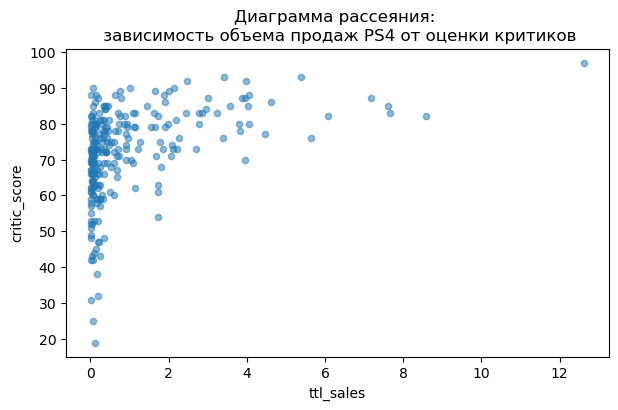

,critic_score,ttl_sales
critic_score,1.000000,0.406568
ttl_sales,0.406568,1.000000


In [53]:
ps = ddf.loc[ddf.platform == 'PS4']

ps.loc[ddf.critic_score != -1,['critic_score','ttl_sales']] \
        .plot(kind = 'scatter', y = 'critic_score', x = 'ttl_sales', alpha=0.5, figsize = (7,4))
plt.title('Диаграмма рассеяния: \n зависимость объема продаж PS4 от оценки критиков') #Название
plt.show()
ps.loc[ps.critic_score != -1,['critic_score','ttl_sales']].corr()

 - Продажи игр платформы PS4 имеют слабую прямую зависимость от отзывов критиков

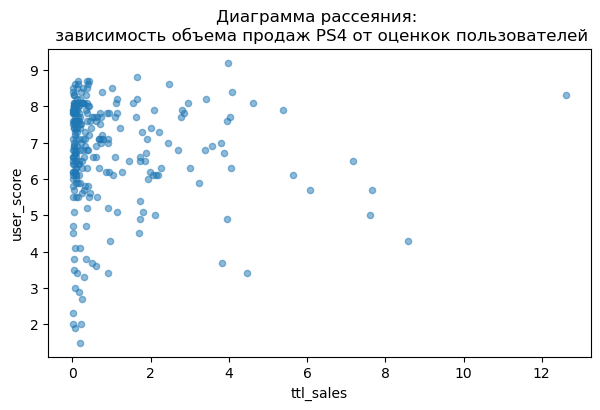

,user_score,ttl_sales
user_score,1.00000,0.00126
ttl_sales,0.00126,1.00000


In [55]:
ps.loc[ddf.user_score != -1,['user_score','ttl_sales']] \
        .plot(kind = 'scatter', y = 'user_score', x = 'ttl_sales', alpha=0.5, figsize = (7,4))
plt.title('Диаграмма рассеяния: \n зависимость объема продаж PS4 от оценкок пользователей') #Название
plt.show()
ps.loc[ps.critic_score != -1,['user_score','ttl_sales']].corr()

 - Объем продаж игр для PS4 не имеют зависимости от отзывов пользователей

#### Соотнесите выводы с продажами игр на других платформах.


In [58]:
ddf.loc[(ddf.critic_score != -1)& (ddf.user_score != -1)].groupby('platform')['name'].count().sort_values()

platform
DS        1
PSP       1
Wii       5
WiiU     89
3DS     100
PSV     106
XOne    165
X360    171
PC      197
PS3     212
PS4     249
Name: name, dtype: int64

- Есть платформы (DS, PSP, Wii) к играм которых очень мало оценок пользователей и критиков, нет смысла сравнивать с ними т.к. невозможно корректно определить наличие зависимости

PS3 :


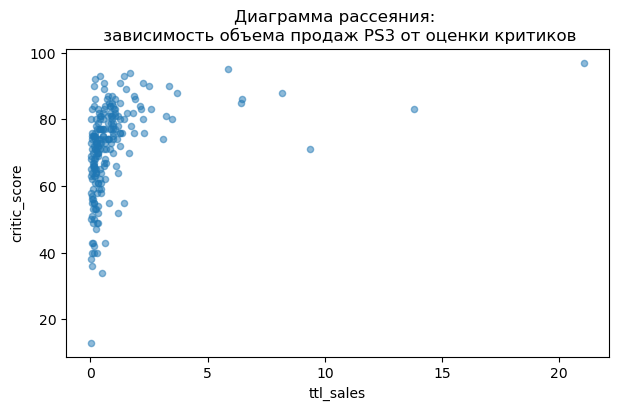

Вывод: зависимость объема продаж от оценки критиков для платформы  PS3  -  положительная средняя (умеренная)
корреляция:  0.33


X360 :


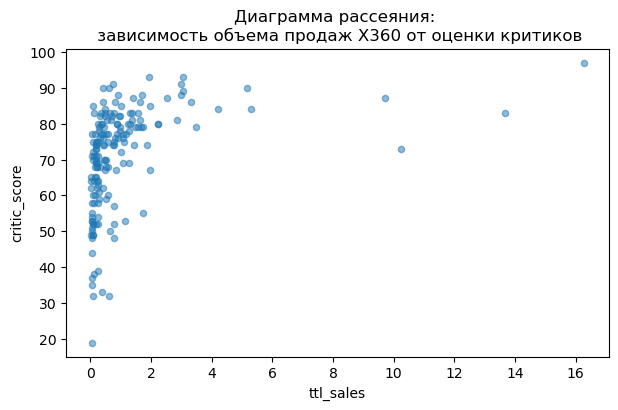

Вывод: зависимость объема продаж от оценки критиков для платформы  X360  -  положительная средняя (умеренная)
корреляция:  0.36


3DS :


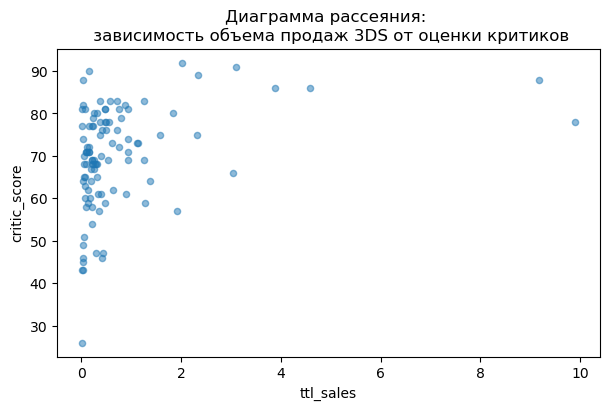

Вывод: зависимость объема продаж от оценки критиков для платформы  3DS  -  положительная средняя (умеренная)
корреляция:  0.32


XOne :


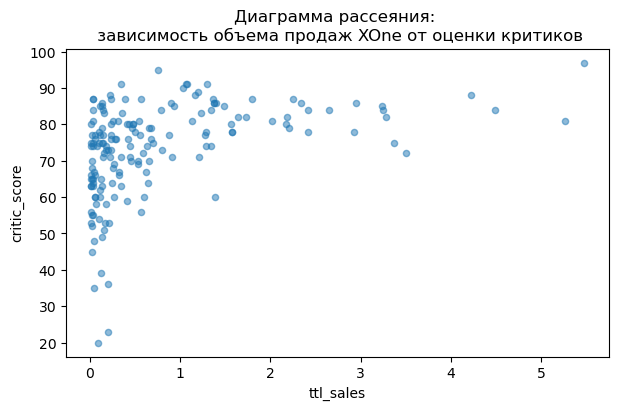

Вывод: зависимость объема продаж от оценки критиков для платформы  XOne  -  положительная средняя (умеренная)
корреляция:  0.42


PC :


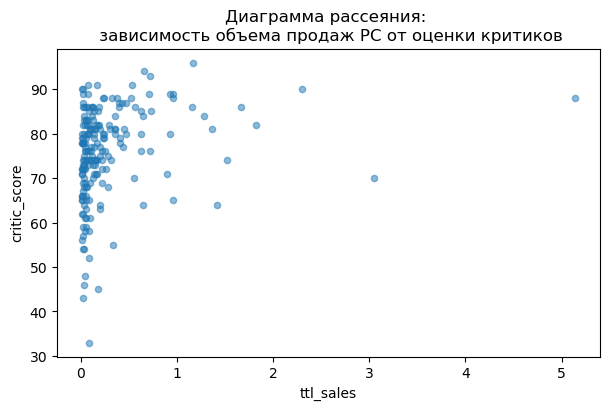

Вывод: зависимость объема продаж от оценки критиков для платформы  PC  -  положительная слабая
корреляция:  0.24


PSV :


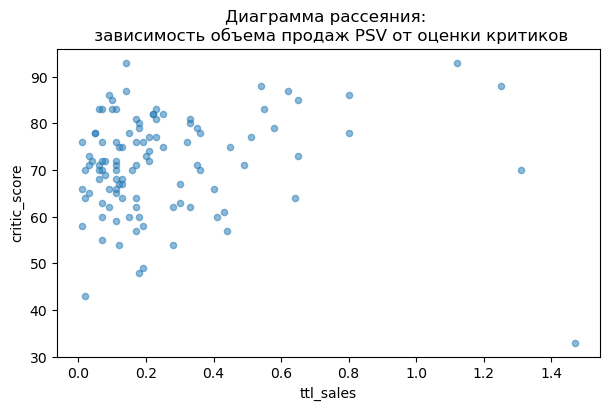

Вывод: зависимость объема продаж от оценки критиков для платформы  PSV  -  положительная отсутствует
корреляция:  0.09




In [60]:
list = ['PS3', 'X360', '3DS', 'XOne', 'PC', 'PSV']
for i in list:
    print(i, ':')
    ps = ddf.loc[ddf.platform == i]
    ps.loc[ps.critic_score != -1,['critic_score','ttl_sales']] \
            .plot(kind = 'scatter', y = 'critic_score', x = 'ttl_sales', alpha=0.5, figsize = (7,4))
    plt.title('Диаграмма рассеяния: \n зависимость объема продаж ' + i + ' от оценки критиков') #Название
    plt.show()
    corr = ps.loc[ps.critic_score != -1,'critic_score'].corr(ps.loc[ps.critic_score != -1,'ttl_sales']).round(2)
    if abs(corr)<0.1:
        degree = 'отсутствует'
    else:
        if corr>0:
            type = 'положительная'
        else: 
            type = 'отрицательная'
        if abs(corr) < 0.3:
            degree = 'слабая'
        elif abs(corr) < 0.5:
            degree = 'средняя (умеренная)'
        elif abs(corr) < 0.7:
            degree = 'средняя(заметная)'
        elif abs(corr) < 0.9:
            degree = 'сильная'
        elif abs(corr) < 1:
            degree = 'очень сильная'
        else:
            degree = ""
    print ('Вывод: зависимость объема продаж от оценки критиков для платформы ', i, ' - ', type, degree)
    print ('корреляция: ', corr)
    print()
    print()

PS3


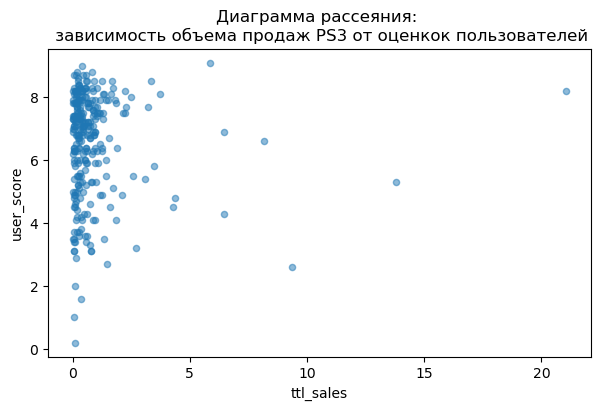

Вывод: зависимость объема продаж от оценки критиков для платформы  PS3  -   отсутствует
корреляция:  -0.01


X360


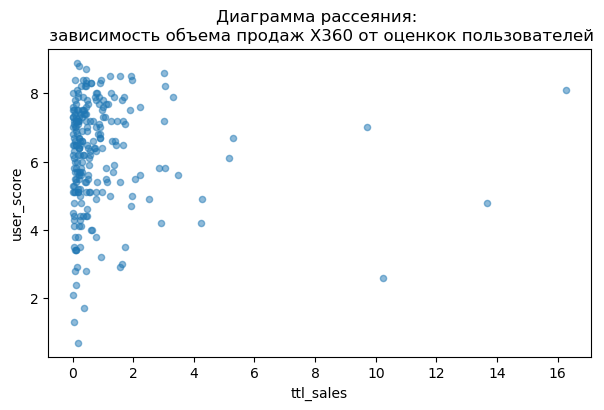

Вывод: зависимость объема продаж от оценки критиков для платформы  X360  -   отсутствует
корреляция:  0.01


3DS


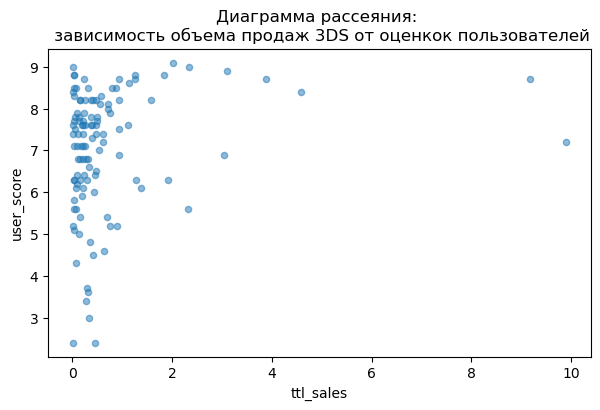

Вывод: зависимость объема продаж от оценки критиков для платформы  3DS  -  положительная слабая
корреляция:  0.2


XOne


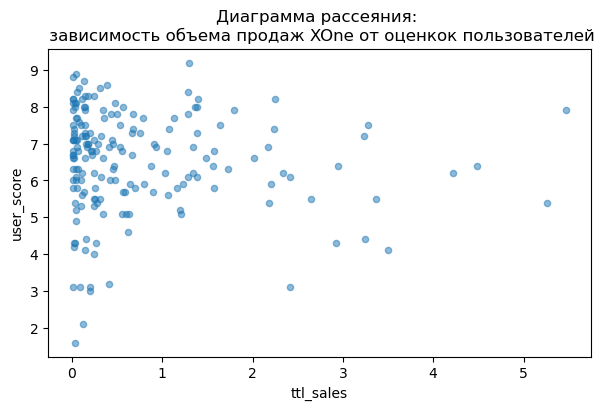

Вывод: зависимость объема продаж от оценки критиков для платформы  XOne  -   отсутствует
корреляция:  -0.07


PC


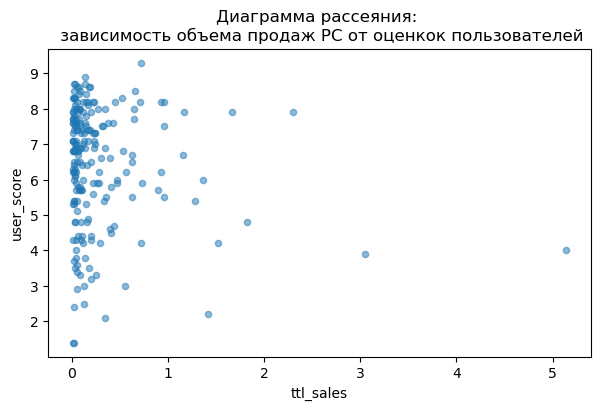

Вывод: зависимость объема продаж от оценки критиков для платформы  PC  -  отрицательная слабая
корреляция:  -0.12


PSV


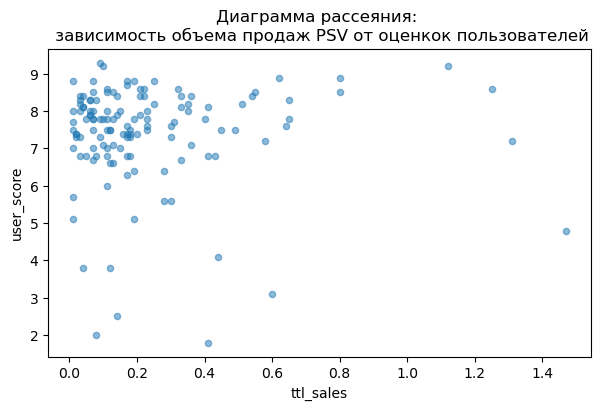

Вывод: зависимость объема продаж от оценки критиков для платформы  PSV  -   отсутствует
корреляция:  -0.0




In [61]:
list = ['PS3', 'X360', '3DS', 'XOne', 'PC', 'PSV']
for i in list:
    print(i)
    ps = ddf.loc[ddf.platform == i]
    ps.loc[ps.user_score != -1,['user_score','ttl_sales']] \
            .plot(kind = 'scatter', y = 'user_score', x = 'ttl_sales', alpha=0.5, figsize = (7,4))
    plt.title('Диаграмма рассеяния: \n зависимость объема продаж '+i+' от оценкок пользователей') #Название
    plt.show()
    corr = ps.loc[ps.user_score!= -1,'user_score'].corr(ps.loc[ps.user_score != -1,'ttl_sales']).round(2)
    if abs(corr)<0.1:
        degree = 'отсутствует'
        type = ""
    else:
        if corr>0:
            type = 'положительная'
        else: 
            type = 'отрицательная'
        
        if abs(corr) < 0.3:
            degree = 'слабая'
        elif abs(corr) < 0.5:
            degree = 'средняя (умеренная)'
        elif abs(corr) < 0.7:
            degree = 'средняя(заметная)'
        elif abs(corr) < 0.9:
            degree = 'сильная'
        elif abs(corr) < 1:
            degree = 'очень сильная'
        else:
            degree = ""
    print ('Вывод: зависимость объема продаж от оценки критиков для платформы ', i, ' - ', type, degree)
    print ('корреляция: ', corr)
    print()
    print()

Аналогично на других платформах : 
 - слабая-умеренная зависимость объема продаж от оценки критиков 
     - корреляция: 0.1-0.4
 - отсутствие зависимости между объемом продаж и оценками пользователей (исключение 3DS - слабая положительная связь)
     - корреляция: <0.1

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

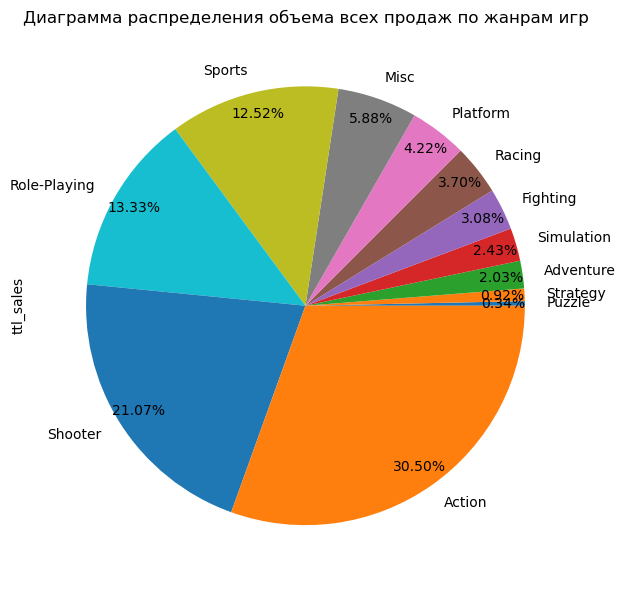

In [64]:
#Распределение продаж по жанрам игр

ddf.groupby('genre')['ttl_sales'].sum().sort_values().plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.9, figsize = (8,6))
plt.title('Диаграмма распределения объема всех продаж по жанрам игр')
plt.tight_layout()
plt.show()

В общем объеме продаж: 
- В основном выручку от продаж в в интернет-магазине «Стримчик» делают экшн игры, шутеры, ролевые и спортивные игры
- Меньше всего на продажи влияют гловоломки (puzzle), стратегии , приключения, симуляторы

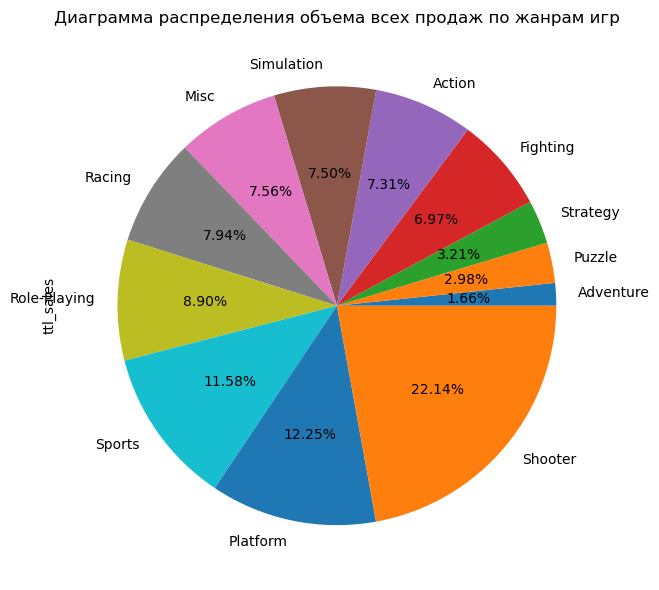

In [66]:
#Распределение продаж по жанрам игр
ddf.groupby('genre')['ttl_sales'].mean().sort_values().plot(kind = 'pie', autopct='%1.2f%%',figsize = (8,6))
plt.title('Диаграмма распределения объема всех продаж по жанрам игр')
plt.tight_layout()
plt.show()

В расчете на каждую игру: 
- Наибольший объем продаж на единицу игр приносят игры стрелялки(шутеры), платформеры, спортивные и ролевые игры 
- Наименьшие продажи каждой игры в следующих жанрах: приключения, головоломки, стратегии, файтинги
- Интересно, что экшн игры составляют наибольшую долю в объеме продаж, скорее всего за счет того что их выпускается большое количество, поскольку в расчете на каждую игру объем продаж меньше чем у большинства жанров 

### Вывод по исследовательскому анализу данных:

**1) Количество выпускаемых игр:**
- С 1995 года начался значительный рост выпуска игр, достигнув пика в 2008 году.
- В последние годы количество выпускаемых игр снизилось и стабилизировалось, что позволяет рассматривать период с 2012 по 2016 годы как актуальный для анализа и построения прогноза.

**2) Продажи по платформам:**
- В среднем платформы существуют на рынке 7-8 лет и затем сменяются более новыми.
- Наиболее прибыльными платформами являются PS4, PS3, и X360, однако большинство платформ имеют тенденцию к снижению продаж.

**3) Влияние отзывов пользователей и критиков на продажи разных платформ:**
- Объем продаж игр имеет слабую прямую зависимость от оценок критиков.
- Продажи игр не зависят от отзывов пользователей.

**4) Распределение продаж по жанрам:**
- Наиболее прибыльными жанрами являются экшн, шутеры, ролевые и спортивные игры.
- Меньше всего прибыли приносят головоломки, стратегии, приключения и симуляторы.

## Шаг 4. Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

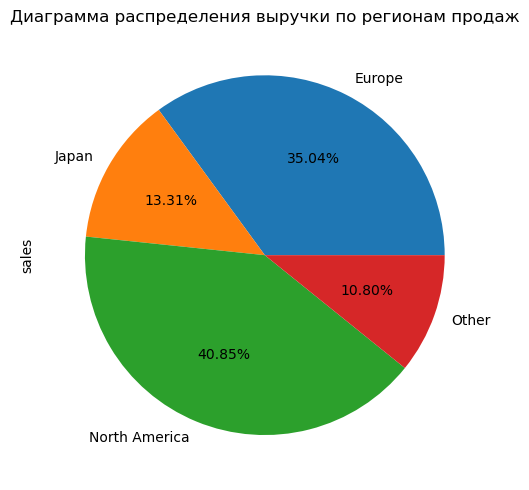

In [70]:
#Распределение продаж по прегионам продаж
df_unpivot = pd.melt (ddf, value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']) 
df_unpivot.columns = ['region','sales']
df_unpivot.region = df_unpivot.region.replace ({
    'na_sales':'North America',
    'eu_sales':'Europe',
    'jp_sales':'Japan',
    'other_sales':'Other'
})
df_unpivot = df_unpivot.groupby('region')['sales'].sum()
df_unpivot.plot(kind = 'pie', autopct='%1.2f%%',figsize = (7,5))
plt.title('Диаграмма распределения выручки по регионам продаж')
plt.tight_layout()
plt.show()

- 40% игр реализуется магазином «Стримчик» в Северной Америке 
- На втором месте страны Европы 
- На Японию и другие страны приходится 24%

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [73]:
def region_user(col, name):
    print ('Топ-5 самых популярных платформ в', name)
    for i in ddf.groupby('platform')[col].sum().sort_values(ascending = False).head(5).reset_index()['platform']:
        print  ("    ·", i)
    ddf.groupby('platform')[col].sum().sort_values(ascending = False) \
        .plot(kind = 'pie',autopct='%1.2f%%', pctdistance=0.9, figsize = (11,6))
    plt.title(f'Доли продаж платформ в {name}')
    plt.tight_layout()
    plt.show()

Топ-5 самых популярных платформ в Северной Америке
    · X360
    · PS4
    · PS3
    · XOne
    · 3DS


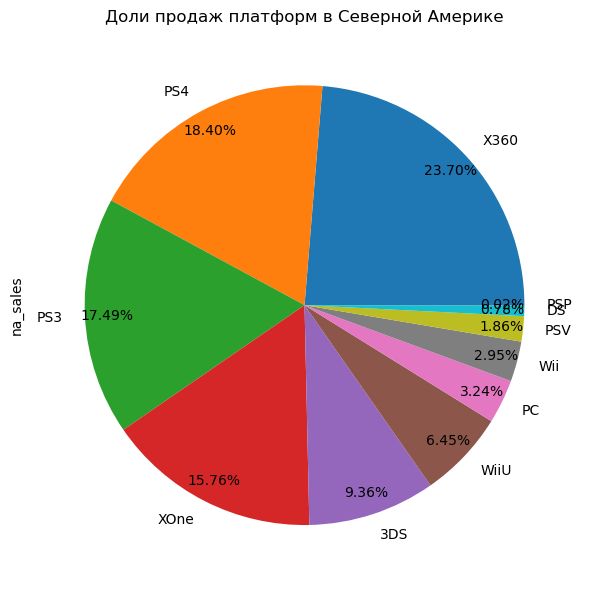

In [74]:
#Северна Америка 
region_user('na_sales', 'Северной Америке')

Топ-5 самых популярных платформ в Европе
    · PS4
    · PS3
    · X360
    · XOne
    · 3DS


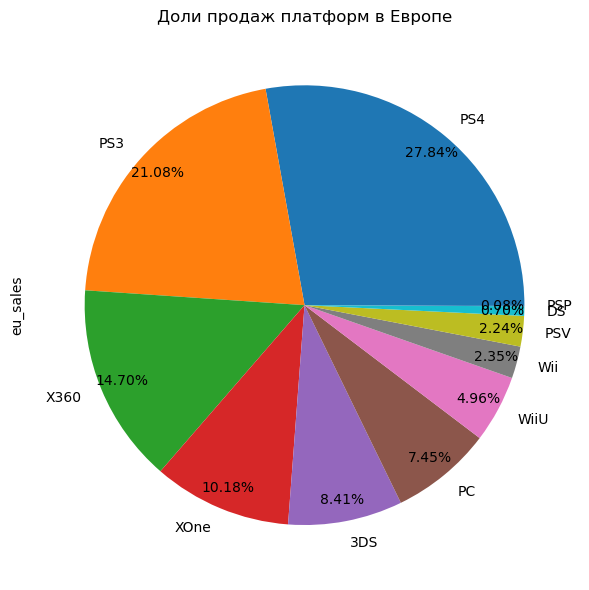

In [75]:
#Европа
region_user('eu_sales', 'Европе')

Топ-5 самых популярных платформ в Японии
    · 3DS
    · PS3
    · PSV
    · PS4
    · WiiU


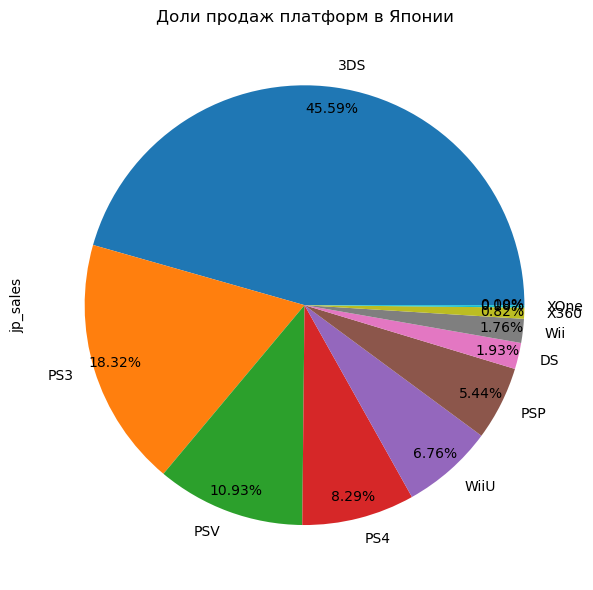

In [76]:
#Япония
region_user('jp_sales', 'Японии')

- Каждая страна имеет свои предпочтения в игровых платформах, что отражается в различиях в долях продаж и топ-5 платформах.
- В топ 5 платформ во всех странах вошли : PS4, 3DS, PS3 - на них стабильно приходится более половины объема всех продаж региона
- Ввиду малой доли продаж в Японии, можно также отметить платформу X360 которая находится в топе Америки и Европы
- Японский игровой рынок имеет некоторые особенности по сравнению с американским и европейским:
    - В Японии самыая популярная платформа - 3DS, на продажи таких игр приходится 45.6%, 
    - В отличии от Северной Америки и Европы, где на платформу 3DS приходится 9.4% и  8.4% продаж соответственно


### Самые популярные жанры (топ-5). Поясните разницу.

In [79]:
def region_user(col, name):
    print ('Топ-5 самых популярных жанров в', name)
    for i in ddf.groupby('genre')[col].sum().sort_values(ascending = False).head(5).reset_index()['genre']:
        print  ("    ·", i)
    ddf.groupby('genre')[col].sum().sort_values(ascending = False) \
        .plot(kind = 'pie',autopct='%1.2f%%', pctdistance=0.9, figsize = (11,6))
    plt.title(f'Распределение продаж по жанрам игр в {name}')
    plt.tight_layout()
    plt.show()
    print ('Рейтинг самых продаваемых игр ', name)
    for i in ddf.groupby(['name','genre'])[col].sum().sort_values(ascending = False).head(7).reset_index()['name']:
        print  ("    ·", i)

Топ-5 самых популярных жанров в Северной Америке
    · Action
    · Shooter
    · Sports
    · Role-Playing
    · Misc


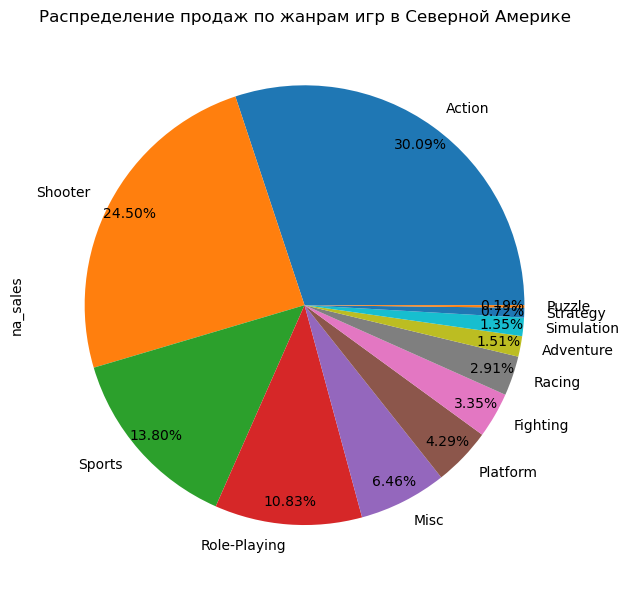

Рейтинг самых продаваемых игр  Северной Америке
    · Grand Theft Auto V
    · Call of Duty: Ghosts
    · Call of Duty: Black Ops II
    · Call of Duty: Black Ops 3
    · Minecraft
    · Call of Duty: Advanced Warfare
    · Halo 4


In [80]:
#Северна Америка 
region_user('na_sales', 'Северной Америке')

Топ-5 самых популярных жанров в Европе
    · Action
    · Shooter
    · Sports
    · Role-Playing
    · Racing


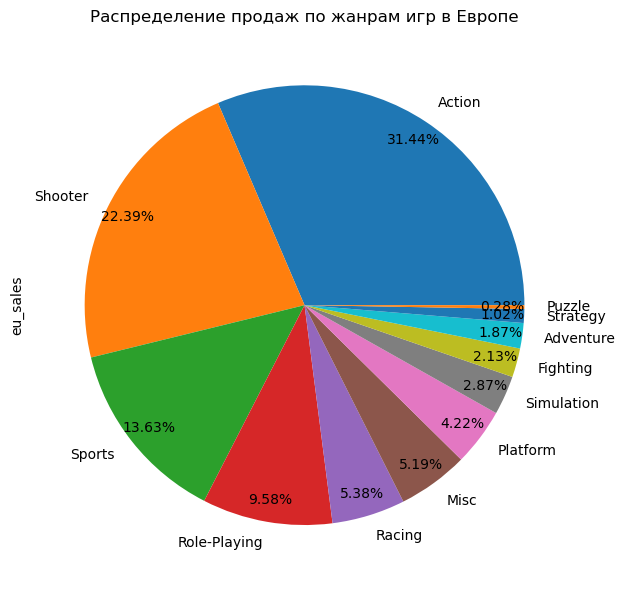

Рейтинг самых продаваемых игр  Европе
    · Grand Theft Auto V
    · FIFA 15
    · FIFA 16
    · FIFA 14
    · Call of Duty: Black Ops II
    · FIFA Soccer 13
    · Call of Duty: Black Ops 3


In [81]:
#Европа
region_user('eu_sales', 'Европе')

Топ-5 самых популярных жанров в Японии
    · Role-Playing
    · Action
    · Misc
    · Simulation
    · Fighting


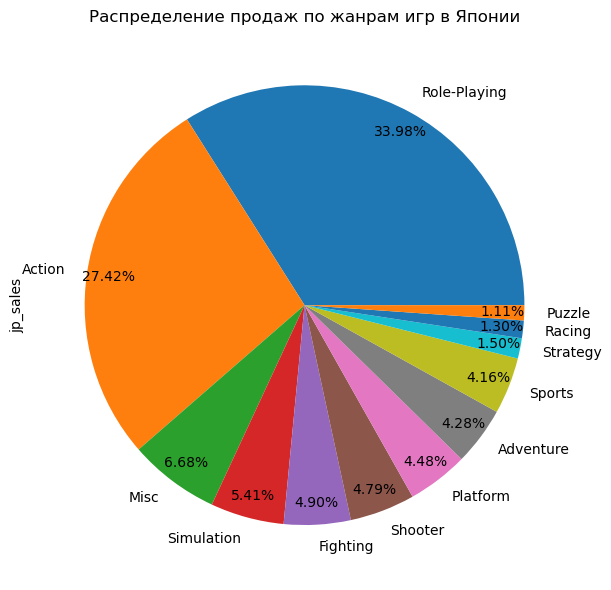

Рейтинг самых продаваемых игр  Японии
    · Animal Crossing: New Leaf
    · Pokemon X/Pokemon Y
    · Monster Hunter 4
    · Super Smash Bros. for Wii U and 3DS
    · Yokai Watch 2 Ganso/Honke
    · Pokemon Black 2/Pokemon White 2
    · Pokemon Omega Ruby/Pokemon Alpha Sapphire


In [82]:
#Япония
region_user('jp_sales', 'Японии')

- Американский и Европейский рынок имеют схожие предпочтения по жанрам игр, у них совпадают топ-4 жанра по популярности: 
    - Action
    - Shooter
    - Sports
    - Role-Playing
    
- Самые продаваемые игры в Северной Америке: 
    - Grand Theft Auto V
    - Call of Duty
    - Minecraft
- Самые продаваемые игры в Европе: 
    - Grand Theft Auto V
    - FIFA 
    - Call of Duty


- Японский рынок также как и в предпочтении платформ имеет свои специфические отличия: 
    - В топе нет таких популярных жанров как шуттеры и спорт
    - Зато есть менее популярные в остальных регионах симуляторы и игры, не поддающиеся под определенные категории жанров (Misc).
    
- Самые продаваемые игры в Японии: 
    - Animal Crossing
    - Pokemon 
    - Monster Hunter 
    - Super Smash Bros
    
    
- Если выбирать жанры для всех регионов продаж то стоит остановиться на:
    - Action
    - Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Значения рейтингов:

- "M" (Mature) - Предназначено для лиц старше 17 лет. 
- "E" (Everyone) - Подходит для всех возрастов. 
- "E10+" (Everyone 10 and older) - Подходит для всех, кто старше 10 лет. 
- "T" (Teen) - Подходит для подростков старше 13 лет. 

In [86]:
esrb = ddf.loc[ddf['age_group'] != -1]
esrb.age_group = esrb.age_group.replace ({
    'E':'0 \n Everyone',
    'E10+':'1 \n Everyone 10+',
    'T':'2 \n Teen',
    'M':'3 \n Mature'
})

In [87]:
def region_esrb (reg,name):
    esrb.groupby('age_group')[reg].sum().plot(kind = 'bar', grid = True, figsize = (5,4))
    plt.xlabel ('Возрастная категория игры')
    plt.ylabel ('Объем продаж (миллионы копий)')
    plt.title (f'Зависимость объема продаж игры от ее возрастной категории в {name}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

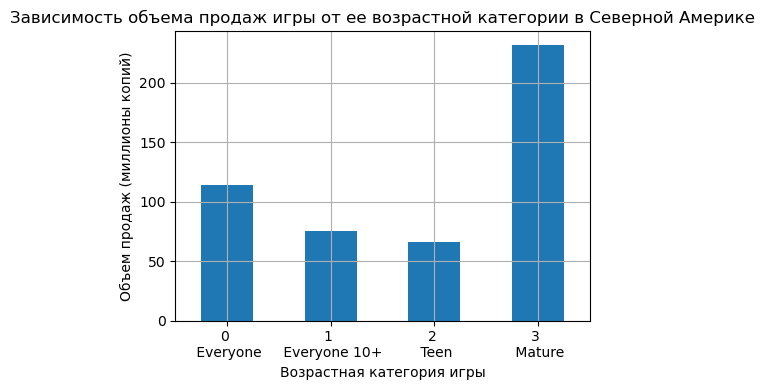

In [88]:
#Северна Америка 
region_esrb('na_sales', 'Северной Америке')

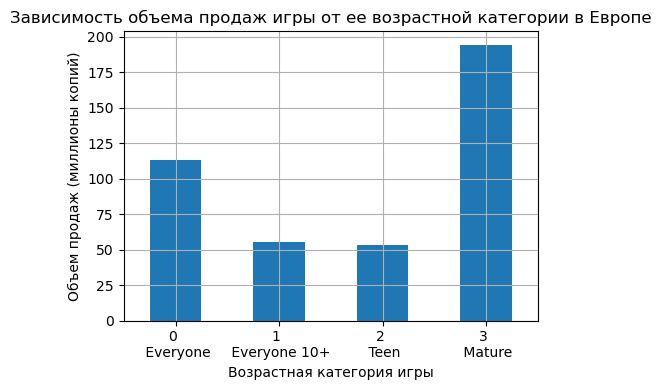

In [89]:
#Европа
region_esrb('eu_sales', 'Европе')

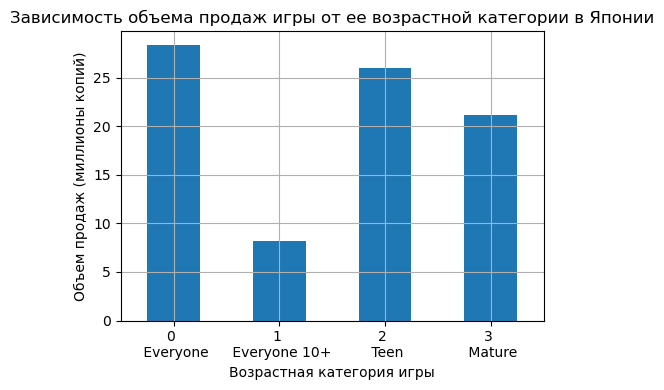

In [90]:
#Япония
region_esrb('jp_sales', 'Японии')

- В Северной Америке и Европе продажи игр с рейтингом "Mature" (для взрослых) значительно превышают продажи игр с другими рейтингами, они составляют почти половину от общих продаж (47,5% и 46.7% соответственно)
- Рынок Японии специфичен и отличается от американского и европейского, здесь превалируют продажи игр без возрастных ограничений (они составляют 33.8% от общих продаж в Японии)
- Скорее всего на рынках Америки и Европы игры приобретает взрослая аудитория для себя, а Японии чаще приобретают для детей и  подростков до 17 лет 
- Игры категории 10+ и  на всех рынках занимает последнее/предпоследнее место по популярности 

### Портрет пользователя каждого региона:

##### Северная Америка:
- **Самые популярные платформы:**
  - X360
  - PS4
  - PS3

- **Самые популярные жанры:**
  - Action
  - Shooter
  - Sports

- **Влияние рейтинга ESRB на продажи:**
  - Продажи игр с рейтингом "Mature" (для взрослых) значительно превышают продажи игр с другими рейтингами

##### Европа:
- **Самые популярные платформы:**
  - PS4
  - PS3
  - X360

- **Самые популярные жанры:**
  - Action
  - Shooter
  - Sports

- **Влияние рейтинга ESRB на продажи:**
  - Продажи игр для взрослой аудитории превышают продажи игр с другими рейтингами

##### Япония:
- **Самые популярные платформы:**
  - 3DS
  - PS3
  - PSV

- **Самые популярные жанры:**
  - Role-Playing
  - Action
  - Misc

- **Влияние рейтинга ESRB на продажи:**
  - Продажи игр без возрастных ограничений "Everyone" превалируют

##### Общий вывод:
- В Северной Америке и Европе схожие предпочтения по платформам и жанрам игр, но в Японии есть свои специфические особенности.
- Игры с рейтингом `Mature` пользуются большим спросом в Северной Америке и Европе, в то время как в Японии более популярны игры без возрастных ограничений `Everyone`.
- `Action` и `Shooter` являются самыми популярными жанрами во всех регионах, однако в Японии большую популярность имеют `Role-Playing` игры.
- Потенциально прибыльные платформы:
    - PS4
    - 3DS
    - PS3
    - X360
    
- Самые продаваемые серии игр:
    - Grand Theft Auto V
    - Call of Duty
    - FIFA
    - Call of Duty
    - Minecraft
    - Animal Crossing
    - Pokemon


## Шаг 5. Проверьте гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

- Поясните:
    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**- Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**- Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

Проводим тест о равенстве двух независимых выборок с двусторонней альтернативной гипотезой используя метод ttest_ind

In [96]:
user_score_xone = ddf.loc[(ddf.user_score !=-1)&(ddf.platform == 'XOne'),'user_score']
user_score_pc = ddf.loc[(ddf.user_score !=-1)&(ddf.platform == 'PC'),'user_score']

In [97]:
#H0: user_score_xone = user_score_pc 
#H1: user_score_xone != user_score_pc 

#выборки:
user_score_xone = ddf.loc[(ddf.user_score !=-1)&(ddf.platform == 'XOne'),'user_score'] #пользовательские рейтинги платформы Xbox One 
user_score_pc = ddf.loc[(ddf.user_score !=-1)&(ddf.platform == 'PC'),'user_score'] #пользовательские рейтинги платформы PC

print ('Средние пользовательские рейтинги платформы Xbox One', user_score_xone.mean().round(2))
print ('Средние пользовательские рейтинги платформы PC', user_score_pc.mean().round(2))


# задаём уровень значимости
alpha = 0.05

# проводим ttest 
#проводим тест о равенстве двух независимых выборок с двусторонней альтернативной гипотезой используя метод ttest_ind
results = st.ttest_ind(user_score_xone, user_score_pc) 

print(f'p-value: ' , results.pvalue )

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


Средние пользовательские рейтинги платформы Xbox One 6.52
Средние пользовательские рейтинги платформы PC 6.43
p-value:  0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


- Значение p-value (0.55) значительно больше выбранного уровня значимости (0.05), следовательно нет оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**- Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

**- Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports значимо различаются 

Проводим тест о равенстве двух независимых выборок с двусторонней альтернативной гипотезой используя метод ttest_ind


In [101]:
#H0: user_score_action = user_score_sports
#H1: user_score_action != user_score_sports

#выборки:
user_score_action = ddf.loc[(ddf.user_score !=-1)&(ddf.genre == 'Action'),'user_score'] #пользовательские рейтинги экшн-игр
user_score_sports = ddf.loc[(ddf.user_score !=-1)&(ddf.genre == 'Sports'),'user_score'] #пользовательские рейтинги спортивных соревнований

print ('Средние пользовательские рейтинги жанра Action', user_score_action.mean().round(2))
print ('Средние пользовательские рейтинги жанров Sports', user_score_sports.mean().round(2))


# задаём уровень значимости
alpha = 0.05

# проводим ttest 
#проводим тест о равенстве двух независимых выборок с двусторонней альтернативной гипотезой используя метод ttest_ind
results = st.ttest_ind(user_score_action, user_score_sports) #двусторонняя альтернативная гипотеза

print(f'p-value: ' , results.pvalue )

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги жанра Action 6.83
Средние пользовательские рейтинги жанров Sports 5.46
p-value:  4.804523380462917e-26
Отвергаем нулевую гипотезу


- Полученное значение p-value  меньше заданного уровня значимости, поэтому нулевая гипотеза о равенстве средних пользовательских оценок жанров Action и Sports отвергается в пользу альтернативной 
- Есть основания говорить о том что пользовательские оценки  жанров Action и Sports различны

###  Можно выдвинуть гипотезу о том что в среднем пользователи оценивают экшн-игры выше чем спортивные соревнования 

**- Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны.

**- Альтернативная гипотеза:** Средние пользовательские рейтинги экшн-игр выше чем у спортивных соревнований 
    
Проводим тест о равенстве двух независимых выборок с правосторонней альтернативной гипотезой используя метод ttest_ind


In [105]:
#H0: user_score_action = user_score_sports
#H1: user_score_action > user_score_sports

#выборки:
user_score_action = ddf.loc[(ddf.user_score !=-1)&(ddf.genre == 'Action'),'user_score'] #пользовательские рейтинги экшн-игр
user_score_sports = ddf.loc[(ddf.user_score !=-1)&(ddf.genre == 'Sports'),'user_score'] #пользовательские рейтинги спортивных соревнований

print ('Средние пользовательские рейтинги жанра Action', user_score_action.mean().round(2))
print ('Средние пользовательские рейтинги жанров Sports', user_score_sports.mean().round(2))

# задаём уровень значимости
alpha = 0.05

# проводим ttest 
results = st.ttest_ind(user_score_action, user_score_sports, alternative = 'greater') #правосторонняя альтернативная гипотеза

print(f'p-value: ' , results.pvalue )

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги жанра Action 6.83
Средние пользовательские рейтинги жанров Sports 5.46
p-value:  2.4022616902314585e-26
Отвергаем нулевую гипотезу


- Полученное значение p-value  меньше заданного уровня значимости, поэтому нулевая гипотеза о равенстве средних пользовательских оценок жанров Action и Sports отвергается в пользу альтернативной 
- Есть основания полагать, что пользователи в среднем оценивают выше экшн игры нежели спортивные соревнования 

## Шаг 6. Итоговый вывод исследования:

##### Краткий обзор проведенной работы:
Проведено исследование продаж компьютерных игр в различных регионах (Северная Америка, Европа, Япония)
- Проанализировано распределение продаж по регионам.
- Определены самые популярные платформы и жанры игр в каждом регионе.
- Изучено влияние рейтинга ESRB на продажи игр.

##### Главные выводы:
- Каждый регион имеет свои уникальные предпочтения по платформам и жанрам игр.
- Самыми популярными платформами на момент исследования являлись PlayStation 4, Xbox One, Xbox360 и Nintendo 3DS (в Японии). Однако следует учитывать, что популярность платформ может меняться со временем.
- Во всех регионах самыми популярными жанрами являются Action и Shooter, но в Японии большую популярность имеют Role-Playing игры. Эти жанры имеют стабильный спрос на рынке и приносят значительную выручку.
- Игры с рейтингом "Mature" (для взрослых) продаются лучше всего в Северной Америке и Европе, в то время как в Японии более популярны игры без возрастных ограничений.
- Есть основания полагать, что пользователи в среднем оценивают выше экшн-игры нежели спортивные соревнования, а также оценивают платформ Xbox One и PC без значимых различий

##### Рекомендации:
- Для успешного продвижения игр на мировом рынке необходимо учитывать предпочтения пользователей каждого региона.
- Рекламные кампании Северной Америки следует направить на экшн-игры и шуттеры для платформ X360 и PS4 с рейтингом "Mature" 
- В Европе также стоит фокусировать рекламные кампании на взрослую целевую аудиторию, продвигая экшн-игры и шуттеры на PS4 и PS3
- Продажи в Японии могут быть увеличены за счет увеличения ассортимента игр Role-Playing жанра без возрастных ограничений на платформе Nintendo 3DS